## In-Class Exercise:
### SVM Implementation with the Iris Dataset

#### Import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

#### Load the Iris dataset.

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

#### Split the dataset into training and testing subsets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Implement an SVM classifier and train it on the training subset.

In [4]:
svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

#### Evaluate the classifier on the testing subset and print the accuracy.

In [5]:
# Evaluate the classifier on the testing data
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [7]:
svm_classifier.fit(X_train_pca, y_train)

SVC(random_state=42)

#### Visualize the decision boundaries using appropriate plotting tools.

In [8]:
# Ploting  decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

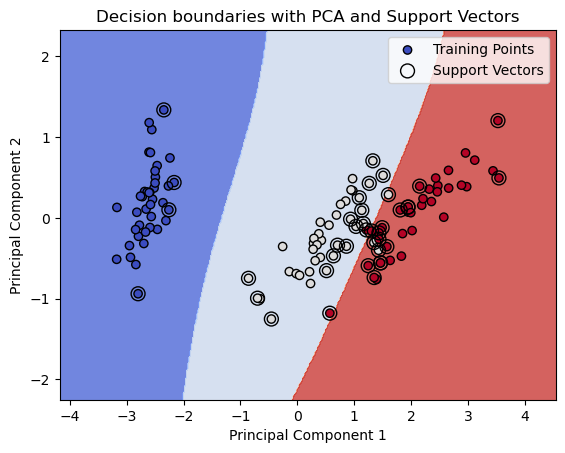

In [9]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# plotting traing plots
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Training Points')

# Plotting support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1, label='Support Vectors')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision boundaries with PCA and Support Vectors')
plt.legend()
plt.show()

#### Implement an SVM classifier using the Iris dataset and visualize the decision boundaries.
* when selecting 2 features for easy representation


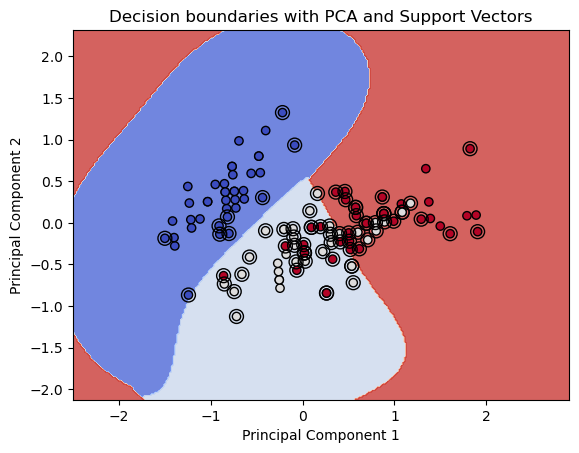

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

# Select the first two features
X_selected = X[:, :2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Reduce the feature dimensions to 2 using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train SVM classifier on the reduced feature set
svm_classifier.fit(X_train_pca, y_train)

# Plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision boundaries with PCA and Support Vectors')
plt.show()
